# Histogram of TWT holders
Data has been downloaded from [bscscan](https://bscscan.com/token/0x4b0f1812e5df2a09796481ff14017e6005508003#balances) and has a limitation of 100k rows. However, it's more than enough to have a picture of tokens distribution across holders. Important to notice, that both X and Y scales are logarithmic. Holders that have less than 1 TWT are not presented. Intervals are (1; 10], (10, 100], ... , (1M, 10M]

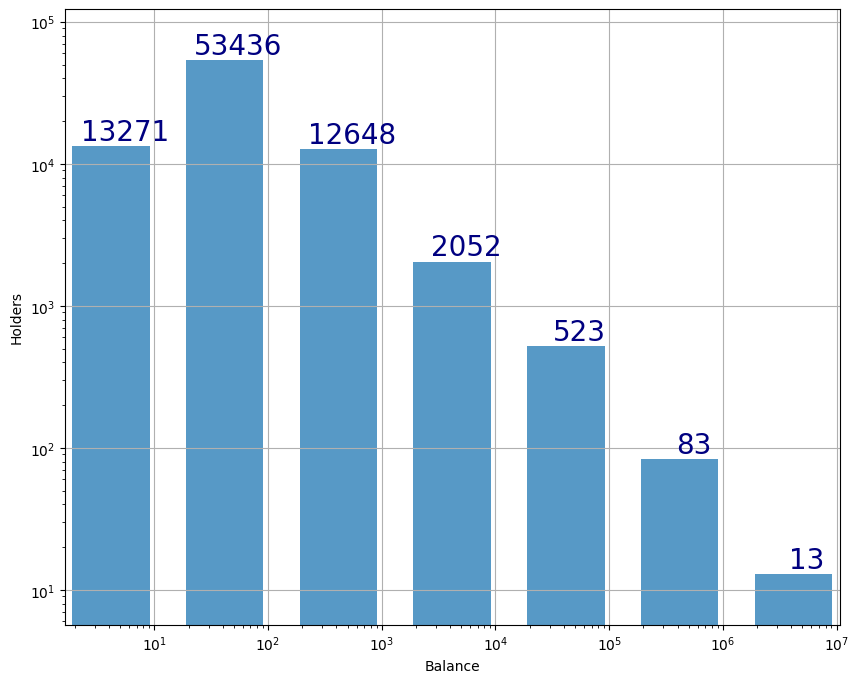

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# You can get the source data here:
# https://bscscan.com/token/0x4b0f1812e5df2a09796481ff14017e6005508003#balances
# Scroll to the bottom and click CSV Export
df = pd.read_csv("twtholders.csv")
df.sort_values("Balance", inplace=True, ascending=False)


plt.figure(figsize=(10,8))
logbins = np.logspace(np.log10(1),np.log10(1e7), 8)

values, bins, bars = plt.hist(df.Balance, bins=logbins, rwidth=0.8, alpha=0.75)
plt.grid(True)
plt.xlabel("Balance")
plt.ylabel("Holders")
plt.bar_label(bars, fontsize=20, color='navy')
plt.xscale('log')
plt.yscale('log')
plt.margins(x=0.01, y=0.1)

plt.show()

More detailed histogram for those who need more precise numbers. Chart is interactive, so you can zoom in and out

In [72]:
import plotly.express as px

# Remove BSC: Token Hub (78% of tokens)
df = df.loc[df["Balance"] < 10000000]

fig = px.histogram(df, x="Balance", text_auto=True, log_y=True, )
fig.show()